<a href="https://colab.research.google.com/github/shivahamidi/Shiva/blob/main/Zoomcamp_midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!cp -r /content/drive/MyDrive/healthcare_dataset.csv healthcare_dataset.csv

In [12]:
df = pd.read_csv('healthcare_dataset.csv', encoding='latin-1') # Try reading the file with 'latin-1' encoding. If this doesn't work, try other encodings like 'cp1252'.
df.shape

(55500, 15)

In [13]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [14]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [16]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [17]:
df.duplicated().sum()

534

In [18]:
df.drop_duplicates(inplace =True)

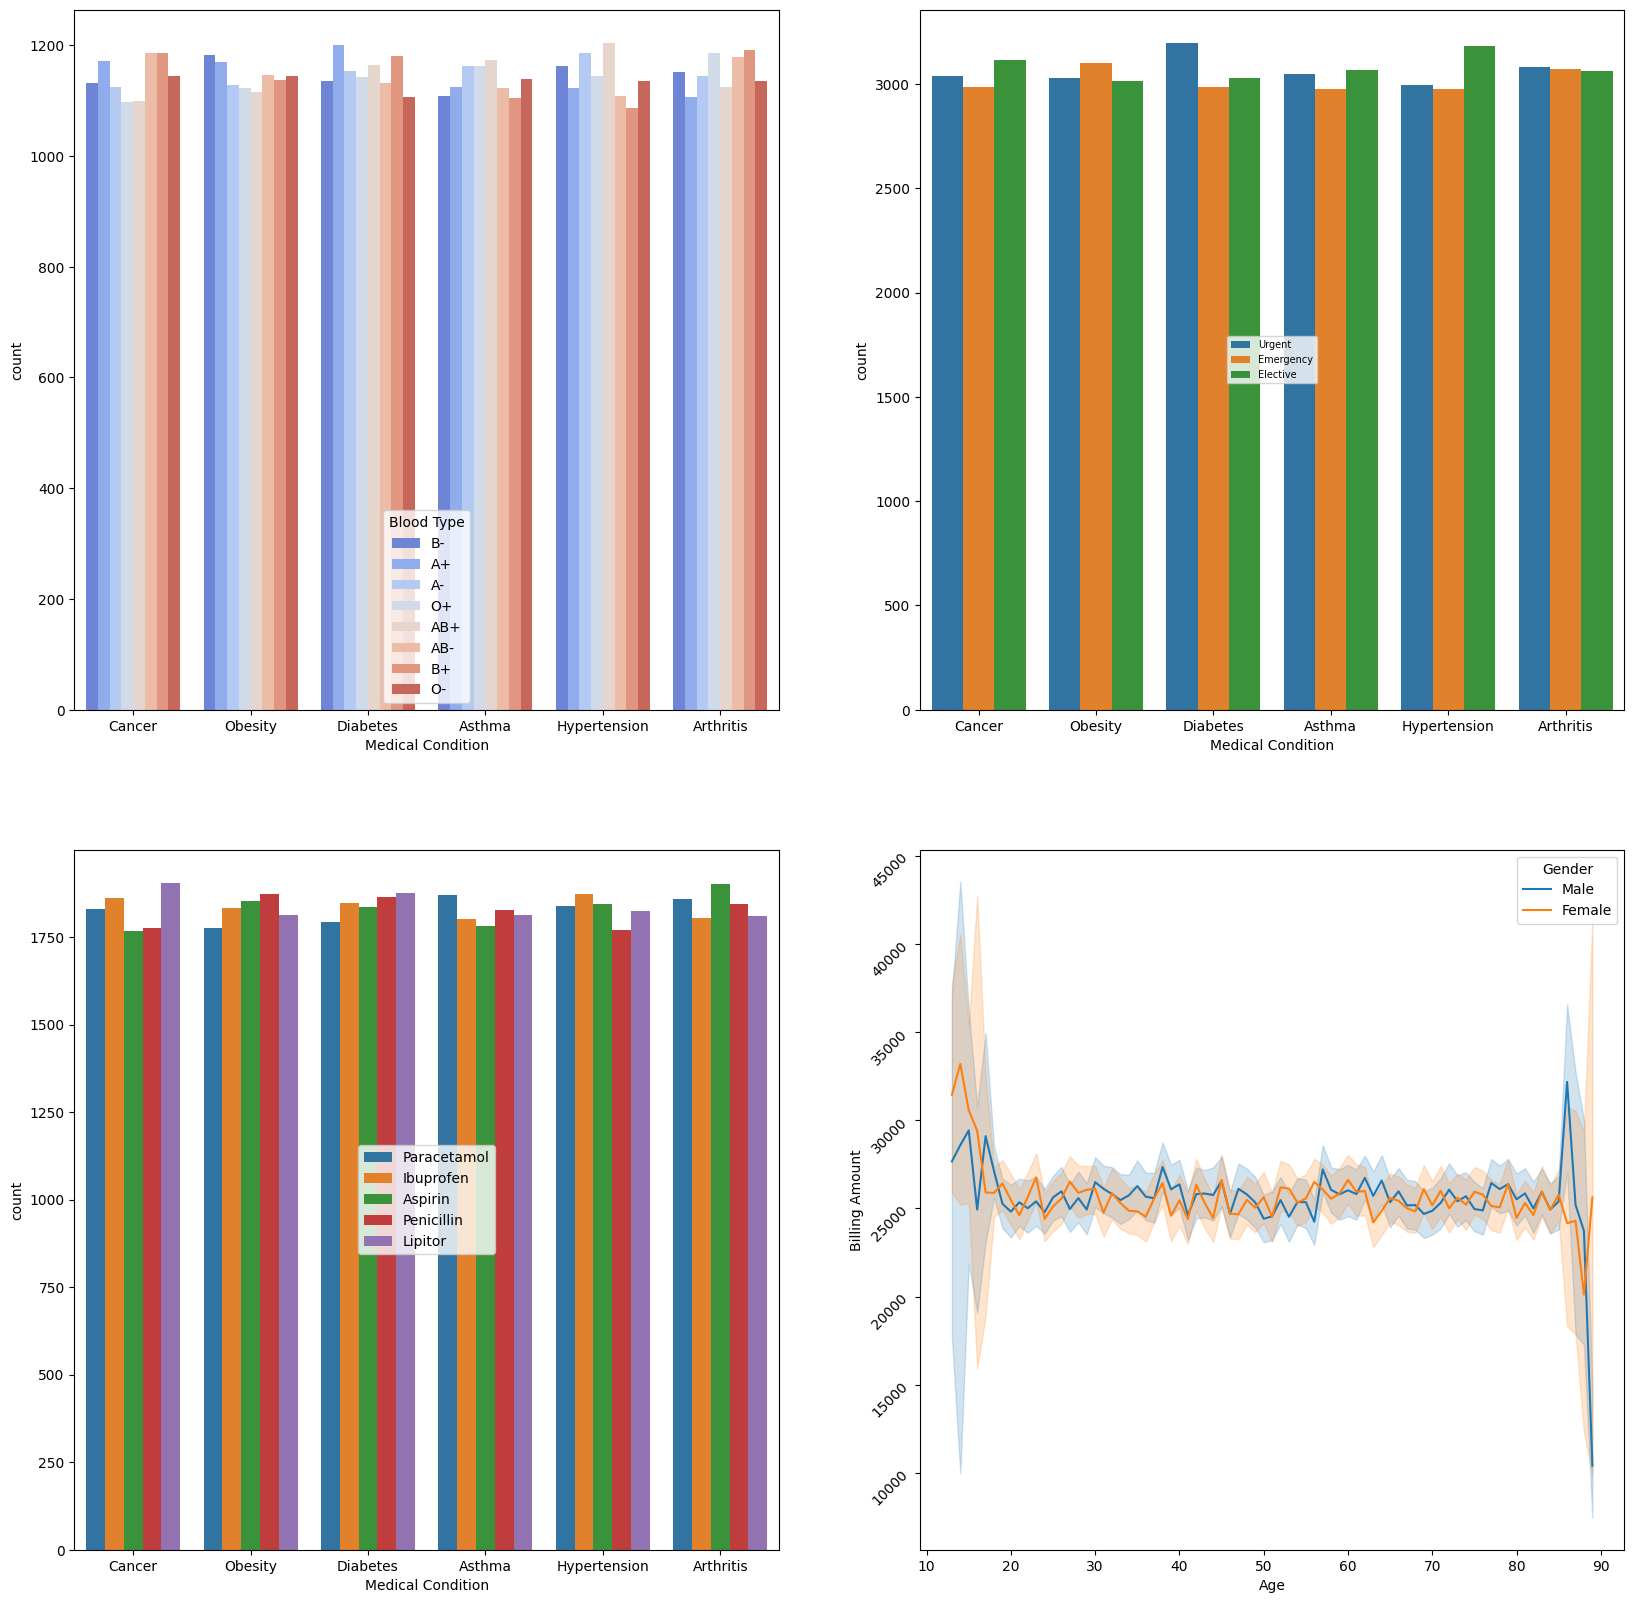

In [19]:
fig, ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot(data=df,x='Medical Condition',palette='coolwarm',hue='Blood Type',ax=ax[0][0])
sns.countplot(data=df,x='Medical Condition',hue='Admission Type',ax=ax[0][1])
sns.countplot(data=df,x='Medical Condition',hue='Medication',ax=ax[1][0])
sns.lineplot(data=df,x='Age',y='Billing Amount',hue=df['Gender'],ax=ax[1][1])
plt.yticks(rotation=45)
ax[0][1].legend(loc='center',fontsize=7)
ax[1][0].legend(loc='center')
plt.show()

<ipython-input-20-bbc7d789cc43>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Days_spent', data=df, palette=custom_pastel_palette)  # Apply custom pastel palette
<ipython-input-20-bbc7d789cc43>:14: UserWarning: 
The palette list has fewer values (8) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Days_spent', data=df, palette=custom_pastel_palette)  # Apply custom pastel palette


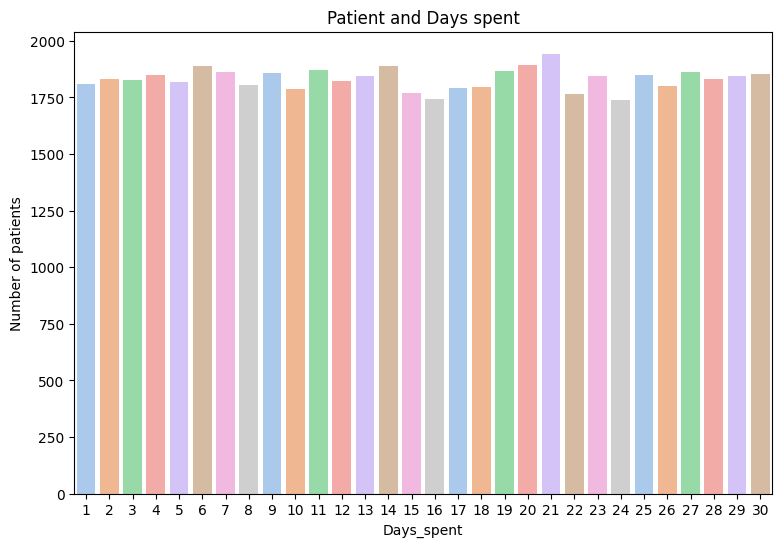

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# days spent in the hospital
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Days_spent'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Create a pastel color palette
custom_pastel_palette = sns.color_palette("pastel", 8)

plt.figure(figsize=(9, 6))
sns.countplot(x='Days_spent', data=df, palette=custom_pastel_palette)  # Apply custom pastel palette
plt.ylabel('Number of patients')
plt.title("Patient and Days spent")
plt.show()


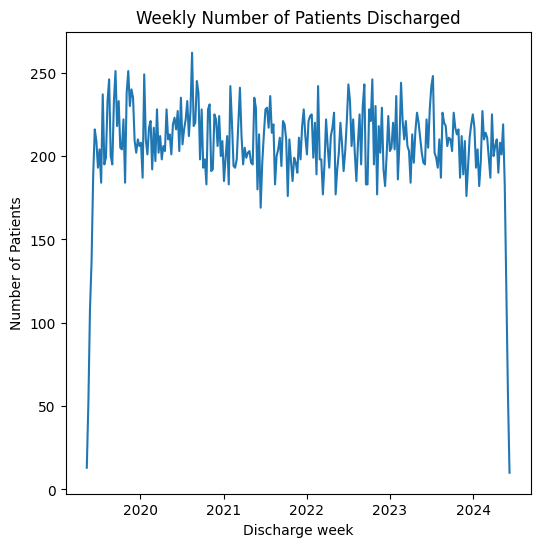

In [21]:
# Create a resampled DataFrame without permanently setting the index
weekly_counts = df.set_index('Discharge Date').resample('W').size()

# Plotting the resampled data
plt.figure(figsize=(6, 6))
sns.lineplot(x=weekly_counts.index, y=weekly_counts.values)
plt.xlabel('Discharge week')
plt.ylabel('Number of Patients')
plt.title('Weekly Number of Patients Discharged')
plt.show()


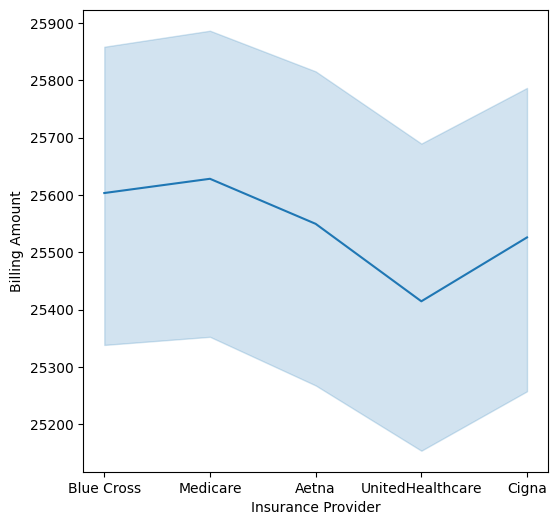

In [22]:
plt.figure(figsize=(6,6))
sns.lineplot(data=df,y=df['Billing Amount'],x=df['Insurance Provider'])
plt.show()

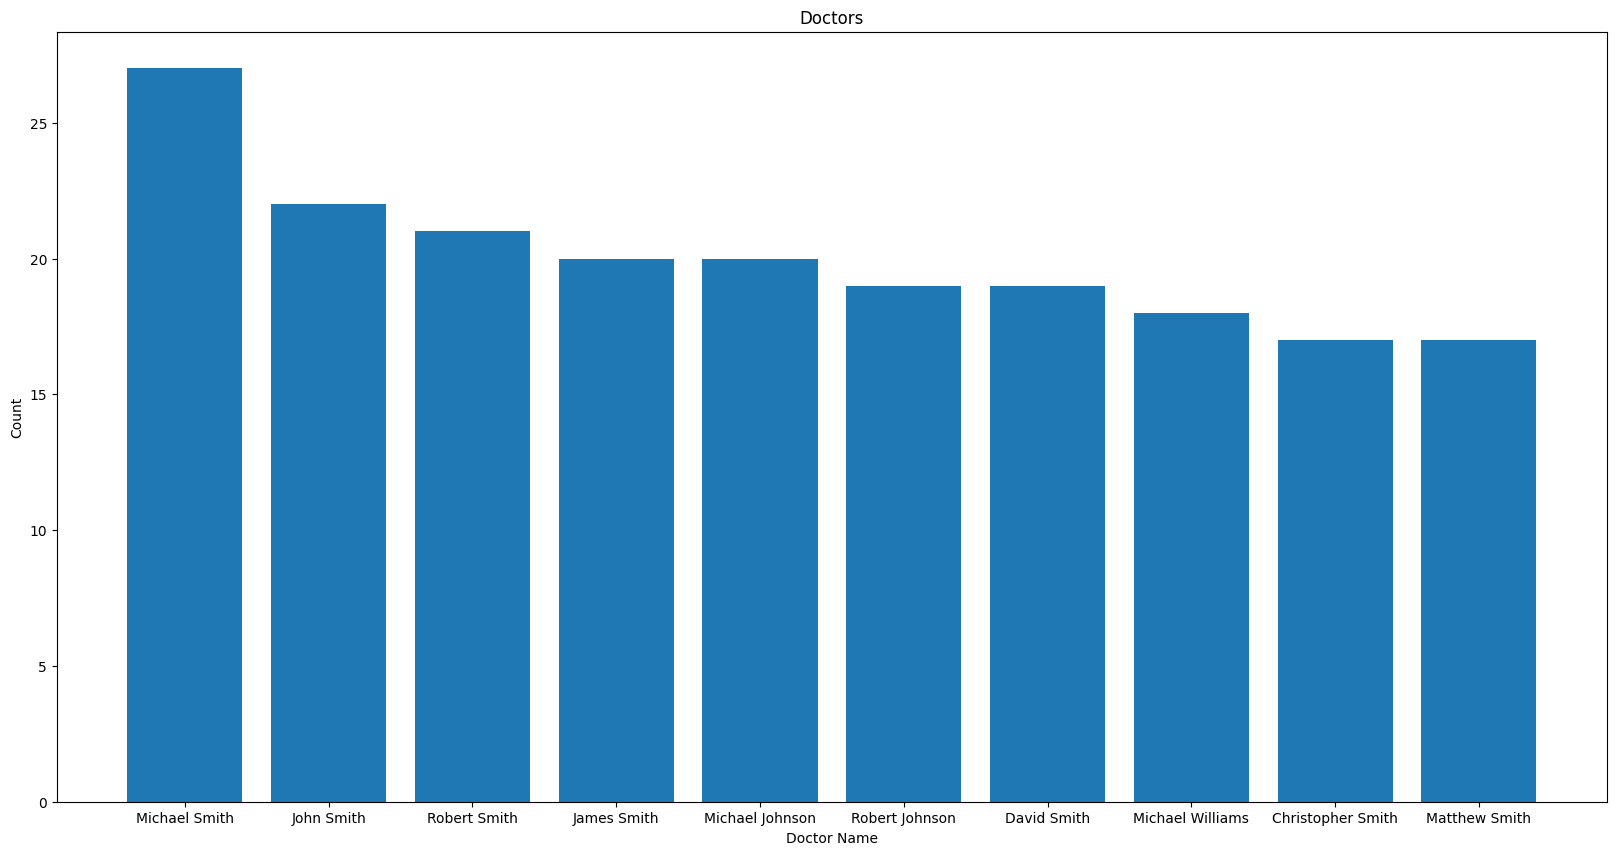

In [23]:
plt.figure(figsize=(20,10))
plt.bar(df.Doctor.value_counts().sort_values(ascending=False).head(10).index,
        df.Doctor.value_counts().sort_values(ascending=False).head(10))
plt.title("Doctors")
plt.xlabel("Doctor Name")
plt.ylabel('Count')
plt.show()

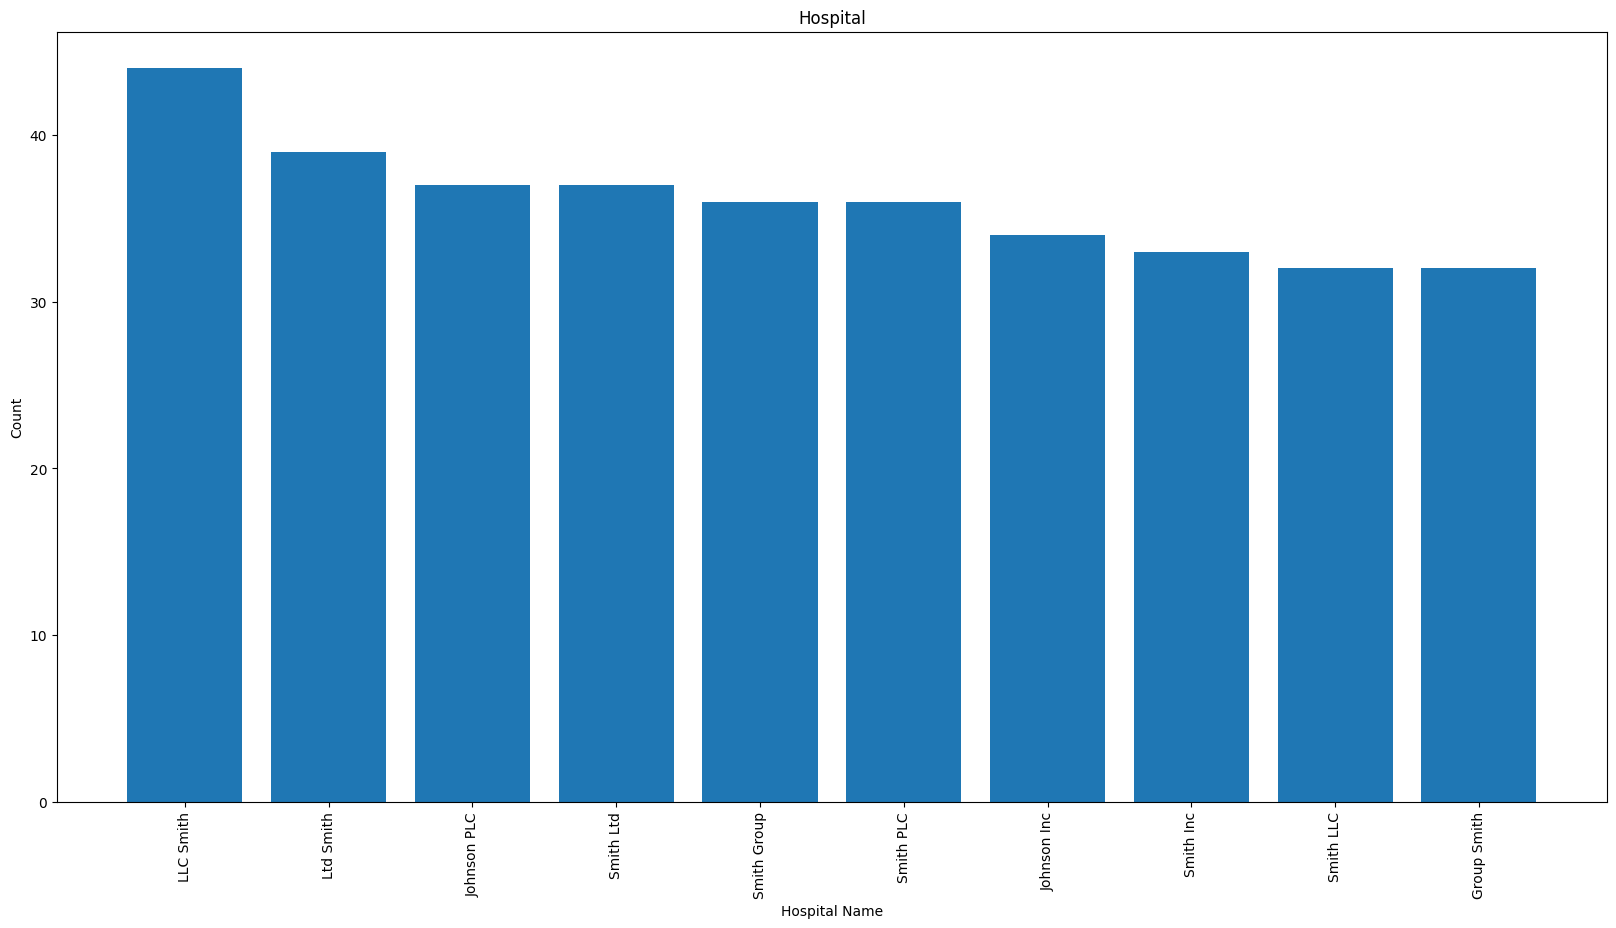

In [24]:
plt.figure(figsize=(20,10))
plt.bar(df.Hospital.value_counts().sort_values(ascending=False).head(10).index,
        df.Hospital.value_counts().sort_values(ascending=False).head(10))
plt.title("Hospital")
plt.xlabel("Hospital Name")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

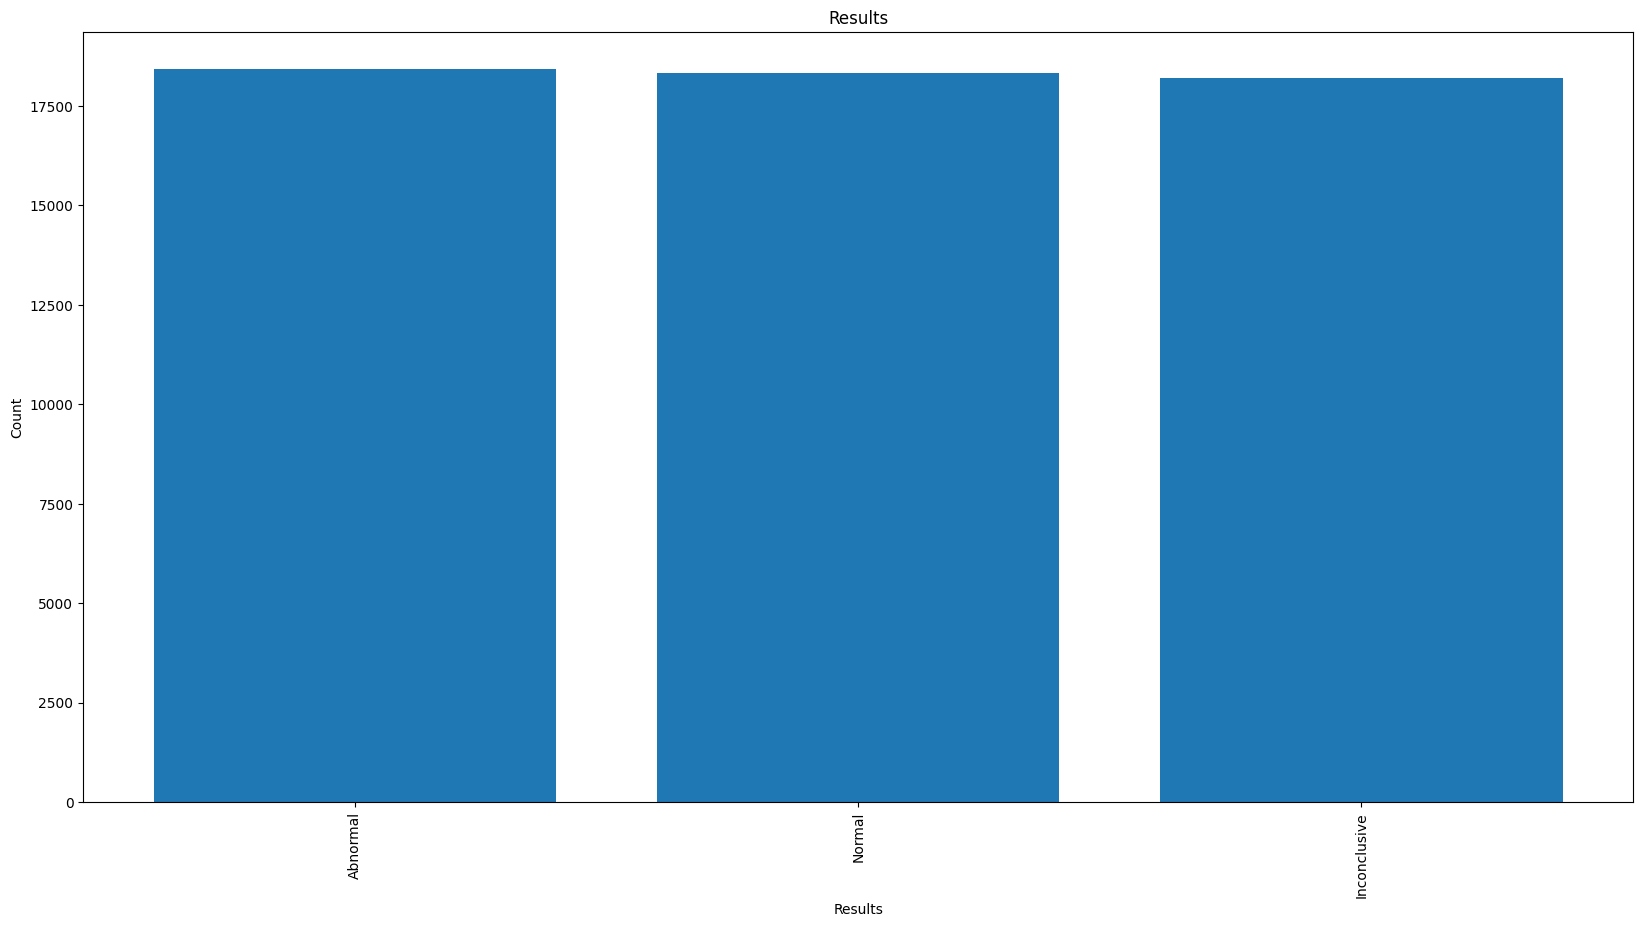

In [25]:
plt.figure(figsize=(20,10))
plt.bar(df['Test Results'].value_counts().sort_values(ascending=False).index,
        df['Test Results'].value_counts().sort_values(ascending=False))
plt.title("Results")
plt.xlabel("Results")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [26]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [27]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [28]:
df['Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [29]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Days_spent', 'Stay'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [31]:
df.drop(columns=['Name','Discharge Date','Date of Admission','Doctor','Hospital','Insurance Provider','Billing Amount','Room Number','Days_spent'], inplace =True)

In [32]:
def split_neg_post(st):
  return st[-1]

In [33]:
df['Blood Type_neg']= df['Blood Type'].apply(split_neg_post)

In [34]:
df['Blood Type_neg'].head()

,Blood Type_neg
0,-
1,+
2,-
3,+
4,+


In [35]:
def split_neg_post_A(st):
    return st[:-1]

In [36]:
df['Blood Type_P']= df['Blood Type'].apply(split_neg_post_A)

In [37]:
df['Blood Type_P'].head()

,Blood Type_P
0,B
1,A
2,A
3,O
4,AB


In [38]:
df.drop(['Blood Type'],axis = 1 ,inplace=True)

In [39]:
df.nunique()

,0
Age,77
Gender,2
Medical Condition,6
Admission Type,3
Medication,5
Test Results,3
Stay,30
Blood Type_neg,2
Blood Type_P,4


In [40]:
cols = df.select_dtypes('object')

In [41]:
cols

,Gender,Medical Condition,Admission Type,Medication,Test Results,Blood Type_neg,Blood Type_P
0,Male,Cancer,Urgent,Paracetamol,Normal,-,B
1,Male,Obesity,Emergency,Ibuprofen,Inconclusive,+,A
2,Female,Obesity,Emergency,Aspirin,Normal,-,A
3,Female,Diabetes,Elective,Ibuprofen,Abnormal,+,O
4,Female,Cancer,Urgent,Penicillin,Abnormal,+,AB
...,...,...,...,...,...,...,...
55495,Female,Asthma,Elective,Penicillin,Abnormal,+,O
55496,Female,Obesity,Elective,Aspirin,Normal,-,AB
55497,Female,Hypertension,Urgent,Ibuprofen,Abnormal,+,B
55498,Male,Arthritis,Elective,Ibuprofen,Abnormal,-,O


In [42]:
from sklearn.preprocessing import LabelEncoder
for c in cols :
    lb = LabelEncoder()
    df[c] = lb.fit_transform(df[[c]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [43]:
df.head()

,Age,Gender,Medical Condition,Admission Type,Medication,Test Results,Stay,Blood Type_neg,Blood Type_P
0,30,1,2,2,3,2,2,1,2
1,62,1,5,1,1,1,6,0,0
2,76,0,5,1,0,2,15,1,0
3,28,0,3,0,1,0,30,0,3
4,43,0,2,2,4,0,20,0,1


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
df.corr()

,Age,Gender,Medical Condition,Admission Type,Medication,Test Results,Stay,Blood Type_neg,Blood Type_P
Age,1.000000,-0.002510,-0.002800,0.004098,-0.006073,-0.006974,0.007890,-0.005209,0.001133
Gender,-0.002510,1.000000,0.000746,0.009642,0.007855,0.005073,0.004224,-0.002146,-0.000226
Medical Condition,-0.002800,0.000746,1.000000,-0.001848,-0.003091,0.002538,-0.006042,0.001448,-0.004609
Admission Type,0.004098,0.009642,-0.001848,1.000000,-0.000411,-0.000602,-0.005066,-0.005734,-0.003127
Medication,-0.006073,0.007855,-0.003091,-0.000411,1.000000,-0.000712,0.001776,0.002032,0.002392
Test Results,-0.006974,0.005073,0.002538,-0.000602,-0.000712,1.000000,0.001289,0.001821,-0.001142
Stay,0.007890,0.004224,-0.006042,-0.005066,0.001776,0.001289,1.000000,-0.001208,-0.001474
Blood Type_neg,-0.005209,-0.002146,0.001448,-0.005734,0.002032,0.001821,-0.001208,1.000000,-0.001339
Blood Type_P,0.001133,-0.000226,-0.004609,-0.003127,0.002392,-0.001142,-0.001474,-0.001339,1.000000


<Axes: >

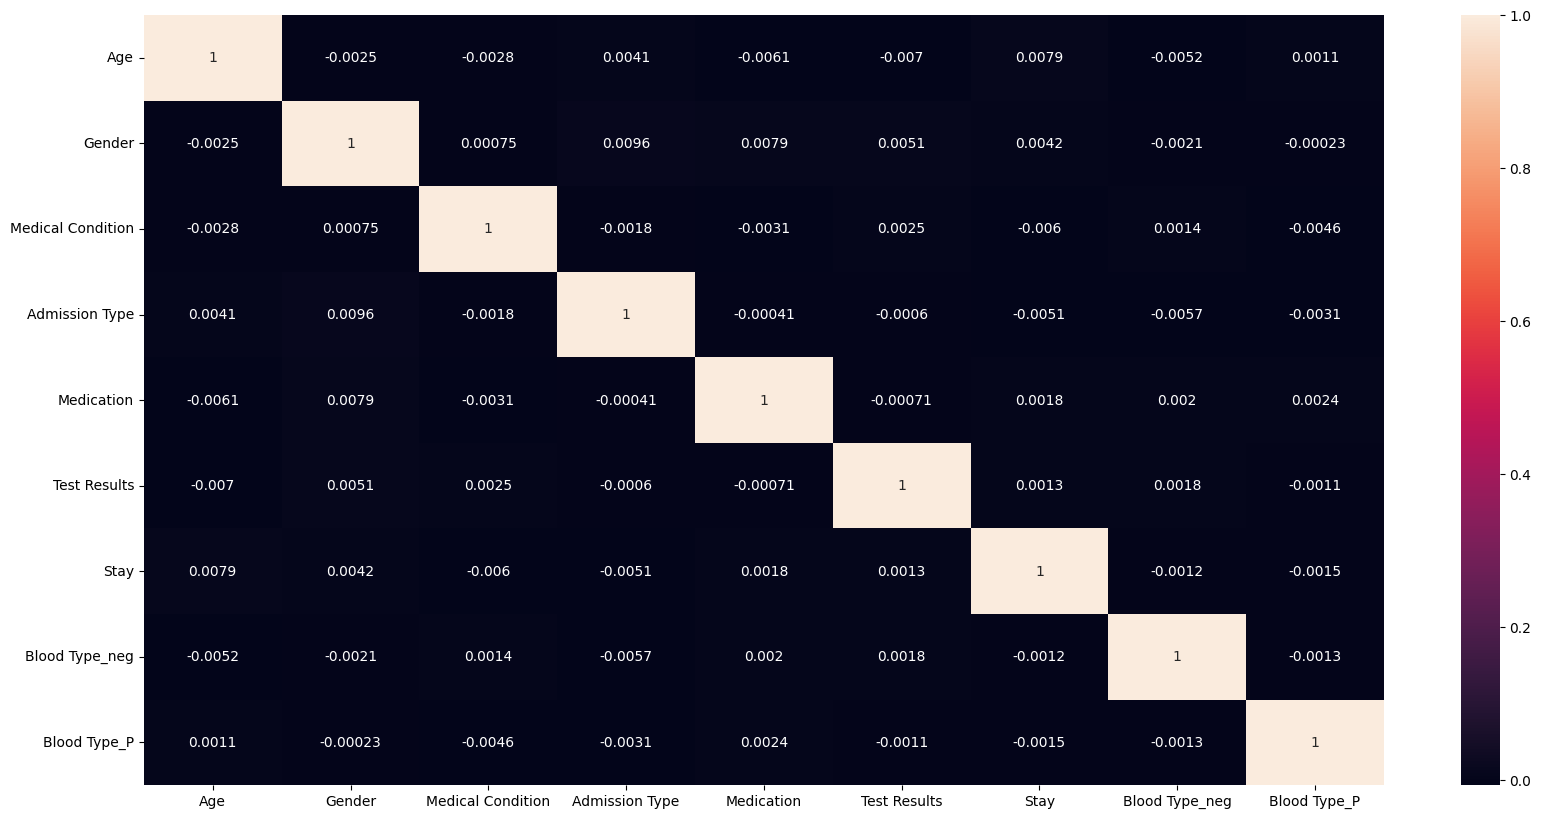

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [47]:
X=df.drop('Test Results',axis = 1)
y=df['Test Results']

In [48]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Dictionary of models
models = {

    'LogisticRegression': LogisticRegression(max_iter = 2000),

    'RandomForestClassifier': RandomForestClassifier(),

    'KNeighborsClassifier' : KNeighborsClassifier(),

    'DecisionTreeClassifier': DecisionTreeClassifier(),

    'GaussianNB'            : GaussianNB(),

    'Support Vector Machine' : SVC()
}

In [50]:
from tqdm import tqdm
# Fit models, predict and calculate accuracy and F1 score
results = []
models_name = []
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    models_name.append(name)
    results.append([accuracy,precision,recall,f1])

 67%|██████▋   | 4/6 [00:09<00:03,  1.98s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 6/6 [02:39<00:00, 26.60s/it]


In [51]:
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score'])

In [52]:
Model_accuracy

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.325086,0.325333,0.325086,0.321369
RandomForestClassifier,0.415136,0.415178,0.415136,0.415131
KNeighborsClassifier,0.337457,0.336744,0.337457,0.329494
DecisionTreeClassifier,0.360469,0.360521,0.360469,0.360464
GaussianNB,0.324359,0.324624,0.324359,0.320990
Support Vector Machine,0.334910,0.224306,0.334910,0.263623


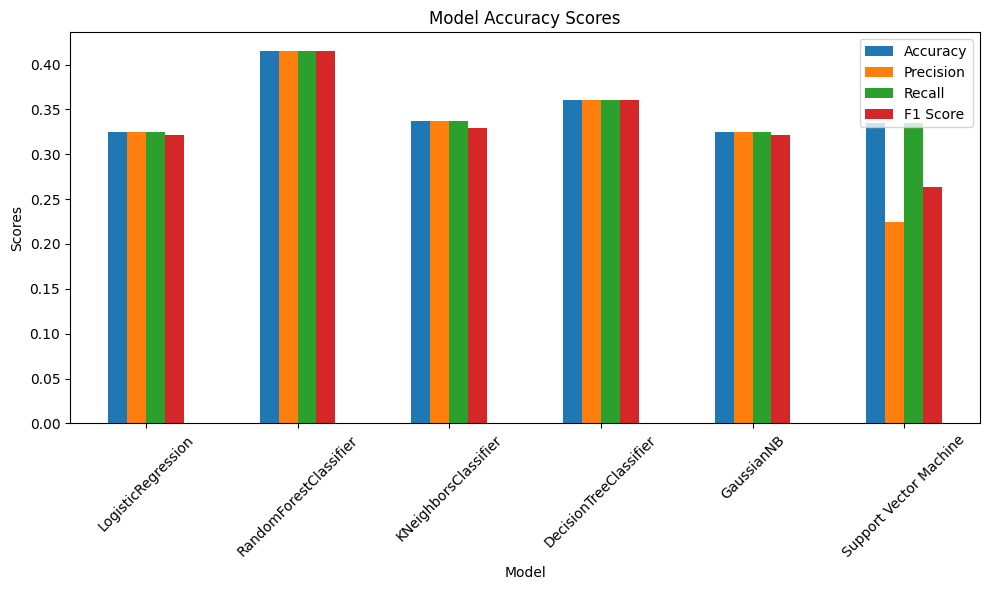

In [53]:
# Plotting
Model_accuracy.plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()

In [54]:
import pickle

In [55]:
output_file = 'model.bin'
output_file

'model.bin'

In [56]:
f_out = open( output_file ,'wb')
pickle.dump(model,f_out)
f_out.close()

In [57]:
with open(output_file,'wb') as f_out:
    pickle.dump(model,f_out)